In [223]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from paper_behavior_functions import (seaborn_style, 
                                      group_colors, figpath,
                                      FIGURE_WIDTH, FIGURE_HEIGHT)
from pylab import cm
from matplotlib import patches as mpatches

# Load some things from paper_behavior_functions
figpath = figpath()
seaborn_style()
pal = group_colors()
# Create an array with the colors we want to use
colors = [[0.92,0.68,0.0353],[0.8,0,0.2]]
colors1 = [[0.8,0,0.2], [0.92,0.68,0.0353]]

# Set custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))


customPalette1 = sns.set_palette(sns.color_palette(colors1))


dataChip14 = pd.read_csv (r'ExperimentalDataChip14.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
simulationsChip14Hyper = pd.read_csv (r'SimulationsChip14Hyper.csv') 
simulationsChip14Normo = pd.read_csv (r'SimulationsChip14Normo.csv') 
predictionChip14DoseB = pd.read_csv (r'PredictionChip14doseB.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
predictionsChip14HyperDoseB = pd.read_csv (r'PredictionsChip14HyperDoseB.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
predictionsChip14NormoDoseB = pd.read_csv (r'PredictionsChip14NormoDoseB.csv')   #read the csv file (put 'r' before the path string to address any special characters in the
#predictionsChip14DifferenceDoseB = pd.read_csv (r'PredictionsChip14DifferenceDoseB.csv')   #read the csv file (put 'r' before the path string to address any special characters in the
print(predictionChip14DoseB)


/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


   time_total  time_GTT  Glucose_mean  Glucose_SEM  Insulin_mean  Insulin_SEM  \
0       288.0       0.0     11.166833     0.669874         21.50         2.78   
1       312.0      24.0      7.984167     0.198015         12.53         3.00   
2       336.0      48.0      7.980500     0.081506          7.07         3.05   
3       359.9      71.9      6.414833     0.115875          3.72         3.49   
4       288.0       0.0      9.997170     1.378520         21.53         2.78   
5       312.0      24.0      8.081330     1.379140         12.81         3.00   
6       336.0      48.0      7.082170     1.324510          7.04         3.15   
7       359.9      71.9      6.383670     1.441720          3.43         3.23   

   Glucose_diff_mean  Glucose_diff_SEM  Insulin   SEM Glycemic_level  
0           1.169663         -0.708646    21.50  2.78  Hyperglycemia  
1          -0.097163         -1.181125    12.53  3.00  Hyperglycemia  
2           0.898330         -1.243004     7.07  3.05  Hy

In [224]:
predictionsChip14HyperDoseB.head()

,time_total,time_GTT,H1_G_opt,H1_G_min,H1_G_max,H2_G_opt,H2_G_min,H2_G_max,H1_I_min,H1_I_max,H2_I_opt,H2_I_min,H2_I_max,Glycemic regime,Unnamed: 14,H1_I_min_nM,H1_I_max_nM,H2_I_min_nM,H2_I_max_nM
0,288.00,0.00,NaN,11.170000,11.170000,NaN,11.170000,11.170000,3500.000000,3500.000000,NaN,3500.000000,3500.000000,NaN,NaN,24.305556,24.305556,24.305556,24.305556
1,288.01,0.01,NaN,11.167033,11.168852,NaN,11.168107,11.169222,3497.790511,3498.585667,NaN,3497.823536,3498.477179,NaN,NaN,24.290212,24.295734,24.290441,24.294980
2,288.02,0.02,NaN,11.164070,11.167705,NaN,11.166217,11.168444,3495.583798,3497.172514,NaN,3495.649777,3496.955678,NaN,NaN,24.274887,24.285920,24.275346,24.284414
3,288.03,0.03,NaN,11.161112,11.166559,NaN,11.164328,11.167667,3493.379833,3495.760529,NaN,3493.478694,3495.435482,NaN,NaN,24.259582,24.276115,24.260269,24.273858
4,288.04,0.04,NaN,11.158158,11.165414,NaN,11.162441,11.166890,3491.178584,3494.349700,NaN,3491.310257,3493.916579,NaN,NaN,24.244296,24.266317,24.245210,24.263310


In [225]:
predictionsChip14HyperDoseB = predictionsChip14HyperDoseB[predictionsChip14HyperDoseB['time_GTT']<=48]
predictionsChip14NormoDoseB = predictionsChip14NormoDoseB[predictionsChip14NormoDoseB['time_GTT']<=48]

/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


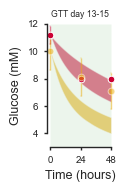

In [226]:
# Plot glucose prediction Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, 
                    hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

fig.map(plt.errorbar, "time_GTT", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3,
       alpha=0.5)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# 
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)#                                         
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[0])

# Overlay shaded area to indicate prediction

rect=mpatches.Rectangle((0,0),48,12, 
                        alpha=0.075,
                        facecolor='green')

plt.gca().add_patch(rect)

plt.text(23, 12.5, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_xlim(-3,50)
fig.ax.set_ylim(3,12)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseH1doseB.pdf"))



/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


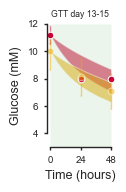

In [227]:
# Plot glucose prediction Hypothesis 2

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

fig.map(plt.errorbar, "time_GTT", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3,
       alpha=0.5)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# 
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)#     
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[0])

rect=mpatches.Rectangle((0,0),48,12, 
                        alpha=0.075,
                        facecolor='green')

plt.text(23, 12.5, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

plt.gca().add_patch(rect)

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_yticks([4,6,8,10,12])
fig.ax.set_xlim(-3,50)
fig.ax.set_ylim(3,12)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseH2doseB.pdf"))


/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


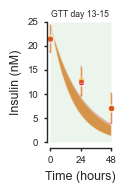

In [228]:
# Plot insulin prediction Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette1,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_GTT", "Insulin_mean", "Insulin_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3,
       alpha=0.5)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# overlay the simulated
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H1_I_min_nM', y2='H1_I_max_nM', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H1_I_min_nM', y2='H1_I_max_nM', alpha=0.5, 
                    facecolor=colors[0])

rect=mpatches.Rectangle((0,0),48,25, 
                        alpha=0.075,
                        facecolor='green')
plt.gca().add_patch(rect)

plt.text(23, 26, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

fig.set_axis_labels('Time (hours)', 'Insulin (nM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_xlim(-3,50)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionInsulinH1doseB.pdf"))


/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


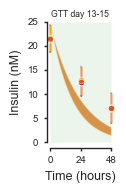

In [229]:
# Plot insulin prediction Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_GTT", "Insulin_mean", "Insulin_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# overlay the simulated
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H2_I_min_nM', y2='H2_I_max_nM', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H2_I_min_nM', y2='H2_I_max_nM', alpha=0.5, 
                    facecolor=colors[0])

rect=mpatches.Rectangle((0,0),48,25, 
                        alpha=0.075,
                        facecolor='green')
plt.gca().add_patch(rect)

plt.text(23, 26, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

fig.set_axis_labels('Time (hours)', 'Insulin (nM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_xlim(-3,50)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionInsulinH2doseB.pdf"))

In [230]:
from scipy.io import loadmat


In [231]:
G_5p5mM_H1 = loadmat('G_5p5mM_H1.mat')
G_11mM_H1 = loadmat('G_11mM_H1.mat')
G_5p5mM_H2 = loadmat('G_5p5mM_H2.mat')
G_11mM_H2 = loadmat('G_11mM_H2.mat')

In [232]:
G_5p5mM_H1['Gmeasured_5p5mM_H1'].shape

(60, 33601)

In [233]:

df_G_5p5mM_H1 = pd.DataFrame.from_records(G_5p5mM_H1['Gmeasured_5p5mM_H1']).transpose()
df_G_11mM_H1 = pd.DataFrame.from_records(G_11mM_H1['Gmeasured_11mM_H1']).transpose()
df_G_5p5mM_H2 = pd.DataFrame.from_records(G_5p5mM_H2['Gmeasured_5p5mM_H2']).transpose()
df_G_11mM_H2 = pd.DataFrame.from_records(G_11mM_H2['Gmeasured_11mM_H2']).transpose()

In [234]:
df_H1 = pd.DataFrame()
df_H2 = pd.DataFrame()

for col in df_G_5p5mM_H1.columns:
    df_H1[col] = df_G_11mM_H1[col] - df_G_5p5mM_H1[col]
    df_H2[col] = df_G_11mM_H2[col] - df_G_5p5mM_H2[col]

In [235]:
df_H1.shape

(33601, 60)

In [236]:
df_H1.iloc[30000:,1].shape

(3601,)

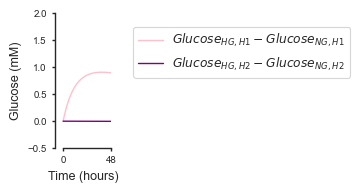

In [237]:
fig = sns.FacetGrid(data=df_H1, 
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)
sns.lineplot(df_H1.iloc[28800:,1:2], palette=['pink'], alpha=1, legend = 'auto', linestyle = '-')
sns.lineplot(df_H2.iloc[28800:,1:2], palette=['purple'], alpha=1, legend = 'auto')

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([28800,33601])
fig.ax.set_yticks([-0.5,0,0.5,1,1.5,2])
fig.ax.set_ylim(-0.5,2)
fig.ax.set_xlim(28000,33601)
fig.ax.set_xticklabels([0,48])
xtix = fig.ax.get_xticks()
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)

legend_labels, _= fig.ax.get_legend_handles_labels()
fig.ax.legend(legend_labels, ['$Glucose_{HG,H1} - Glucose_{NG,H1}$', '$Glucose_{HG,H2} - Glucose_{NG,H2}$'],bbox_to_anchor=(1.4, 0.9), loc='upper left', borderaxespad=0 )

fig.savefig(os.path.join(figpath, "supplementaryFig2.pdf"))

In [238]:
legend_labels

/var/folders/sc/l5j9sjrx6d7f4y39dj1rzps00000gn/T/ipykernel_52762/1814850424.py:4: UserWarning: 
The palette list has fewer values (1) than needed (59) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(df_H2.iloc[28800:,1:60], palette=['purple'], alpha=1, legend = False)


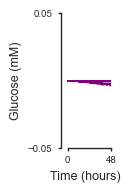

In [239]:
fig = sns.FacetGrid(data=df_H1, 
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)
sns.lineplot(df_H2.iloc[28800:,1:60], palette=['purple'], alpha=1, legend = False)

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([28800,33601])
fig.ax.set_yticks([-0.05,0.05])
fig.ax.set_ylim(-0.05,0.05)
fig.ax.set_xlim(28000,33601)
fig.ax.set_xticklabels([0,48])
xtix = fig.ax.get_xticks()
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)

fig.savefig(os.path.join(figpath, "supplementaryFig2_zoom.pdf"))

In [240]:
palette = ['pink']
print(palette)
print(xtix)

['pink']
[28800 33601]


<AxesSubplot:>

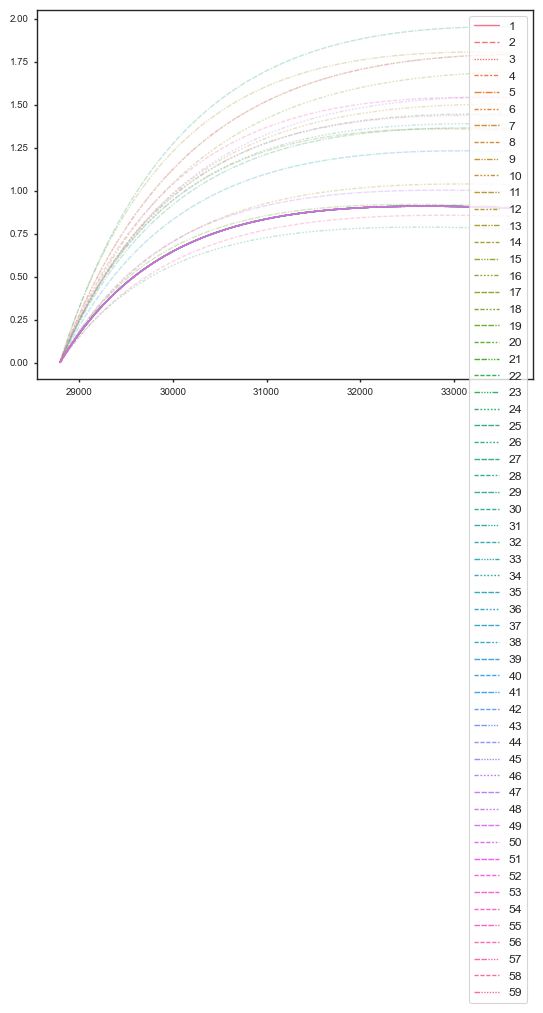

In [241]:
sns.lineplot(df_H1.iloc[28800:,1:60], color='grey', alpha=0.3)

<AxesSubplot:>

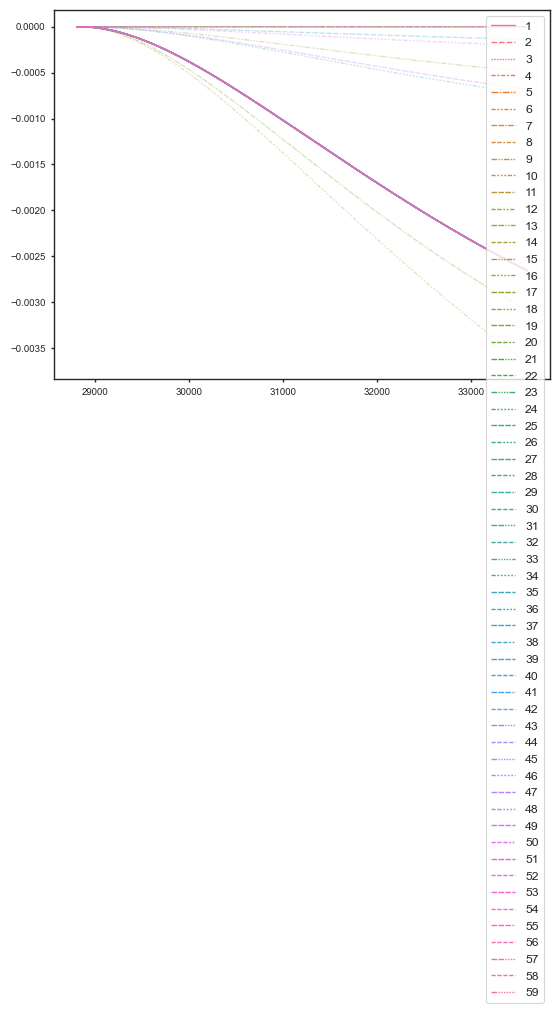

In [242]:
sns.lineplot(df_H2.iloc[28800:,1:60], color='grey', alpha=0.3)